In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Загрузка данных

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
X_origin = data_train.iloc[:, :-1]

Разделяем на численные и категориальные колонки данных

In [7]:
numeric_data = pd.concat([ X_origin.iloc[:, :3], X_origin.iloc[:, [4]] ], axis=1)
categorial_data = pd.concat([ X_origin.iloc[:, [3]] ,  X_origin.iloc[:, 5:] ], axis=1)

In [8]:
categorial_data.head()

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [9]:
numeric_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
0,55,19.50,1026.35,0
1,72,25.85,1872.2,0
2,1,75.90,75.9,0
3,32,79.30,2570,1
4,60,115.25,6758.45,0


In [71]:
y_origin = data_train['Churn']

# Анализ данных

Численные признаки

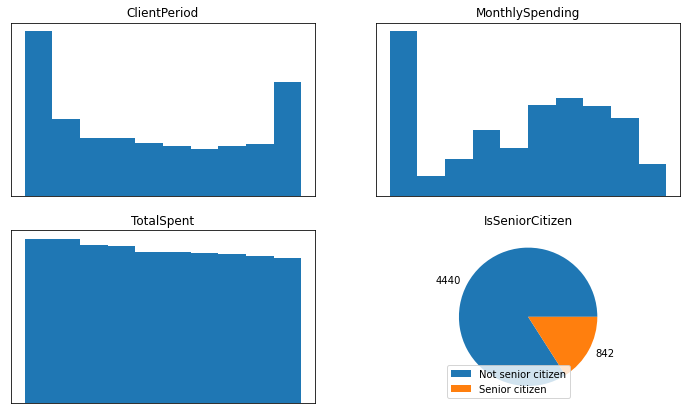

In [11]:
fig = plt.figure(figsize=(12, 7))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ClientPeriod', xticks=[], yticks=[])
ax_2.set(title = 'MonthlySpending', xticks=[], yticks=[])
ax_3.set(title = 'TotalSpent', xticks=[], yticks=[])
ax_4.set(title = 'IsSeniorCitizen', xticks=[], yticks=[])


ax_1.hist(X_origin.ClientPeriod)
ax_2.hist(X_origin.MonthlySpending)
ax_3.hist(X_origin.TotalSpent)

values = X_origin.IsSeniorCitizen.value_counts()
labels = ['Not senior citizen', 'Senior citizen']
ax_4.pie(values, labels= values)
ax_4.legend(labels,loc=3)

plt.show()

Категориальные признаки

In [12]:
categorial_data.head(1)


,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


In [13]:
for column in categorial_data.select_dtypes(include=['object']):
    print(categorial_data[column].value_counts(),'\n')

Male      2655
Female    2627
Name: Sex, dtype: int64 

No     2705
Yes    2577
Name: HasPartner, dtype: int64 

No     3676
Yes    1606
Name: HasChild, dtype: int64 

Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64 

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64 

No                     2099
Yes           

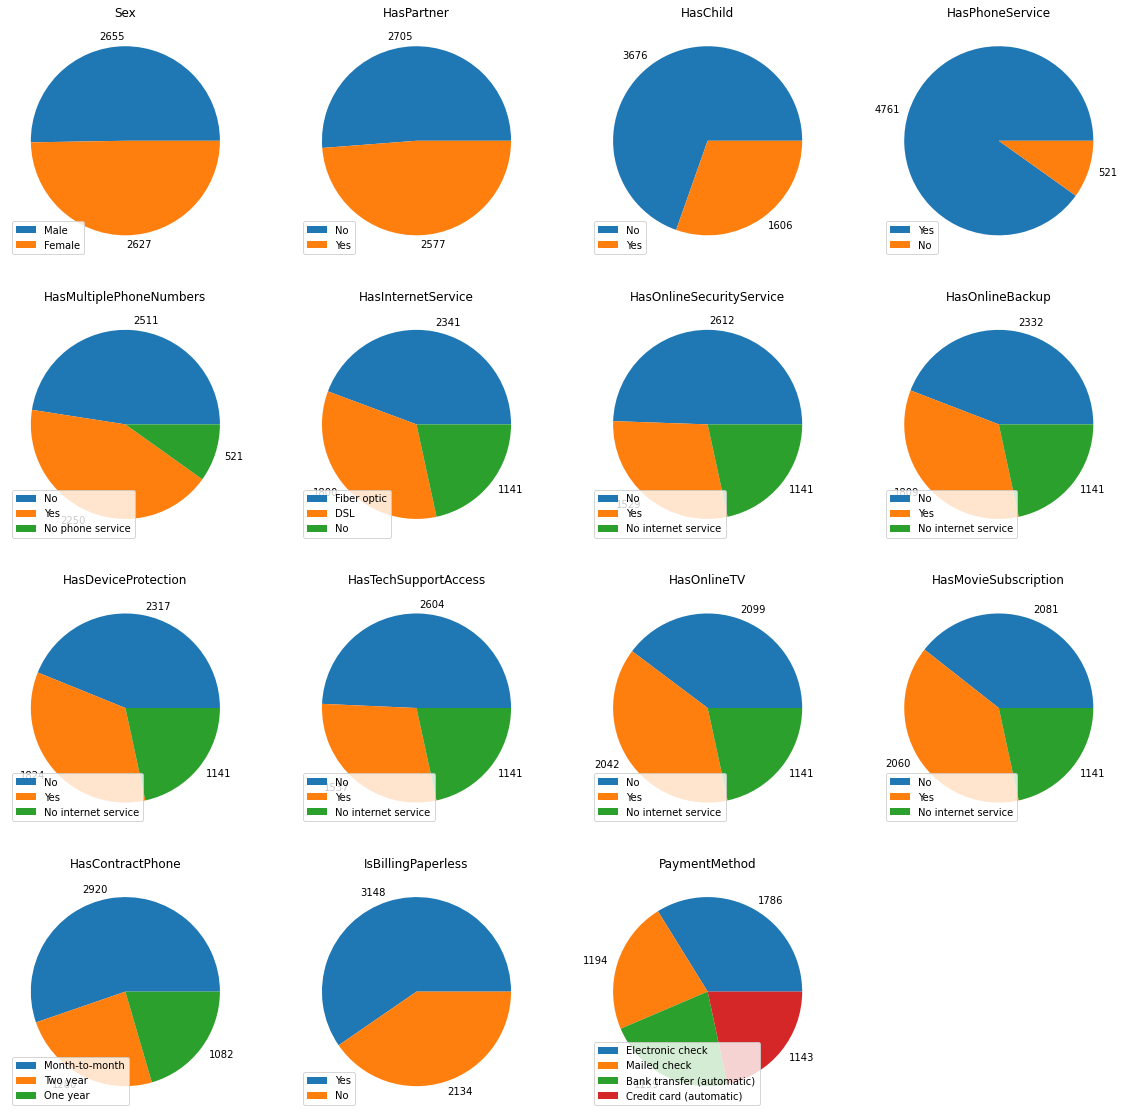

In [14]:
fig = plt.figure(figsize=(20, 20))

ax_1 = fig.add_subplot(4, 4, 1)
ax_2 = fig.add_subplot(4, 4, 2)
ax_3 = fig.add_subplot(4, 4, 3)
ax_4 = fig.add_subplot(4, 4, 4)
ax_5 = fig.add_subplot(4, 4, 5)
ax_6 = fig.add_subplot(4, 4, 6)
ax_7 = fig.add_subplot(4, 4, 7)
ax_8 = fig.add_subplot(4, 4, 8)
ax_9 = fig.add_subplot(4, 4, 9)
ax_10 = fig.add_subplot(4, 4, 10)
ax_11 = fig.add_subplot(4, 4, 11)
ax_12 = fig.add_subplot(4, 4, 12)
ax_13 = fig.add_subplot(4, 4, 13)
ax_14 = fig.add_subplot(4, 4, 14)
ax_15 = fig.add_subplot(4, 4, 15)



ax_1.set(title = 'Sex', xticks=[], yticks=[])

ax_2.set(title = 'HasPartner', xticks=[], yticks=[])
ax_3.set(title = 'HasChild', xticks=[], yticks=[])
ax_4.set(title = 'HasPhoneService', xticks=[], yticks=[])
ax_5.set(title = 'HasMultiplePhoneNumbers', xticks=[], yticks=[])
ax_6.set(title = 'HasInternetService', xticks=[], yticks=[])
ax_7.set(title = 'HasOnlineSecurityService', xticks=[], yticks=[])
ax_8.set(title = 'HasOnlineBackup', xticks=[], yticks=[])
ax_9.set(title = 'HasDeviceProtection', xticks=[], yticks=[])
ax_10.set(title = 'HasTechSupportAccess', xticks=[], yticks=[])
ax_11.set(title = 'HasOnlineTV', xticks=[], yticks=[])
ax_12.set(title = 'HasMovieSubscription', xticks=[], yticks=[])
ax_13.set(title = 'HasContractPhone', xticks=[], yticks=[])
ax_14.set(title = 'IsBillingPaperless', xticks=[], yticks=[])
ax_15.set(title = 'PaymentMethod', xticks=[], yticks=[])

values = X_origin.Sex.value_counts()
labels = ['Male', 'Female']
ax_1.pie(values, labels= values)
ax_1.legend(labels,loc=3)

values = X_origin.HasPartner.value_counts()
labels = ['No', 'Yes']
ax_2.pie(values, labels= values)
ax_2.legend(labels,loc=3)

values = X_origin.HasChild.value_counts()
labels = ['No', 'Yes']
ax_3.pie(values, labels= values)
ax_3.legend(labels,loc=3)

values = X_origin.HasPhoneService.value_counts()
labels = ['Yes', 'No']
ax_4.pie(values, labels= values)
ax_4.legend(labels,loc=3)

values = X_origin.HasMultiplePhoneNumbers.value_counts()
labels = ['No', 'Yes', 'No phone service']
ax_5.pie(values, labels= values)
ax_5.legend(labels,loc=3)

values = X_origin.HasInternetService.value_counts()
labels = ['Fiber optic', 'DSL', 'No']
ax_6.pie(values, labels= values)
ax_6.legend(labels,loc=3)

values = X_origin.HasOnlineSecurityService.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_7.pie(values, labels= values)
ax_7.legend(labels,loc=3)

values = X_origin.HasOnlineBackup.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_8.pie(values, labels= values)
ax_8.legend(labels,loc=3)

values = X_origin.HasDeviceProtection.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_9.pie(values, labels= values)
ax_9.legend(labels,loc=3)

values = X_origin.HasTechSupportAccess.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_10.pie(values, labels= values)
ax_10.legend(labels,loc=3)

values = X_origin.HasOnlineTV.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_11.pie(values, labels= values)
ax_11.legend(labels,loc=3)

values = X_origin.HasMovieSubscription.value_counts()
labels = ['No', 'Yes', 'No internet service']
ax_12.pie(values, labels= values)
ax_12.legend(labels,loc=3)


values = X_origin.HasContractPhone.value_counts()
labels = ['Month-to-month', 'Two year', 'One year']
ax_13.pie(values, labels= values)
ax_13.legend(labels,loc=3)

values = X_origin.IsBillingPaperless.value_counts()
labels = ['Yes', 'No']
ax_14.pie(values, labels= values)
ax_14.legend(labels,loc=3)

values = X_origin.PaymentMethod.value_counts()
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
ax_15.pie(values, labels= values)
ax_15.legend(labels,loc=3)
          
plt.show()

Распределение целевой переменной

In [66]:
y.value_counts()
#распределение несбалансированное, но не сильно

0    3898
1    1384
Name: Churn, dtype: int64

Удалим строки с пропуском значиния

In [40]:
data_train = data_train[data_train["TotalSpent"] != " "]

Для тестовой выборки заменим пустые строки на 0

In [38]:
data_test["TotalSpent"] = data_test["TotalSpent"].apply(lambda x: float(x) if x!=" " else 0)

In [56]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

# Применение линейных моделей

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
train_preprocessed = data_train.copy()
test_preprocessed = data_test.copy() 

In [25]:
train_preprocessed

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [26]:
cat_features = cat_cols
num_features = num_cols

In [27]:
transformer = ColumnTransformer([
                                ('categorical', OneHotEncoder(), cat_features),
                                ('numerical', StandardScaler(), num_features)
                    ], remainder='passthrough')

In [29]:
pipe = Pipeline([
    ('transformer', transformer),
    ('classifier', LogisticRegression()),
])

In [30]:
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                     

In [64]:
# Сетка параметров
param_grid = {
    "classifier__C": [100, 10, 1, 0.1, 0.01, 0.001],
}

In [32]:
gs = GridSearchCV(pipe, param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=5, verbose=10)

In [33]:
gs.fit(train_preprocessed.drop('Churn', axis=1), train_preprocessed.Churn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                           

In [63]:
#Лучшее качество и параметры
gs.best_score_, gs.best_params_

(0.8448208909105489, {'classifier__C': 100})

In [62]:
submission = pd.read_csv('submission.csv')
submission['Churn'] = gs.best_estimator_.predict_proba(test_preprocessed)[:, 1]
submission.to_csv('My submission.csv', index=False)

In [61]:
submission['Churn']

0       0.037024
1       0.735890
2       0.682729
3       0.005711
4       0.001205
          ...   
1756    0.098545
1757    0.025955
1758    0.750646
1759    0.644143
1760    0.009752
Name: Churn, Length: 1761, dtype: float64

# Применение градиентного бустинга

In [67]:
import catboost 

In [69]:
X_origin = data_train.iloc[:, :-1]
X_origin.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check


In [72]:
y_origin

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5273, dtype: int64

In [76]:
X_train_origin, X_valid_origin, y_train_origin, y_valid_origin = train_test_split(X_origin, y_origin, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [77]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train_origin)

Learning rate set to 0.083332
0:	learn: 0.6393850	total: 278ms	remaining: 55.3s
1:	learn: 0.5986678	total: 298ms	remaining: 29.5s
2:	learn: 0.5669397	total: 313ms	remaining: 20.5s
3:	learn: 0.5401092	total: 331ms	remaining: 16.2s
4:	learn: 0.5184259	total: 350ms	remaining: 13.7s
5:	learn: 0.5006508	total: 369ms	remaining: 11.9s
6:	learn: 0.4860068	total: 385ms	remaining: 10.6s
7:	learn: 0.4729220	total: 403ms	remaining: 9.66s
8:	learn: 0.4613053	total: 420ms	remaining: 8.9s
9:	learn: 0.4518849	total: 437ms	remaining: 8.3s
10:	learn: 0.4444709	total: 454ms	remaining: 7.8s
11:	learn: 0.4389258	total: 471ms	remaining: 7.38s
12:	learn: 0.4351742	total: 489ms	remaining: 7.03s
13:	learn: 0.4308061	total: 508ms	remaining: 6.74s
14:	learn: 0.4263292	total: 526ms	remaining: 6.49s
15:	learn: 0.4224699	total: 544ms	remaining: 6.25s
16:	learn: 0.4199115	total: 560ms	remaining: 6.03s
17:	learn: 0.4175362	total: 577ms	remaining: 5.83s
18:	learn: 0.4142761	total: 593ms	remaining: 5.65s
19:	learn: 0.4

In [78]:
y_test_predicted = boosting_model.predict_proba(test_preprocessed)[:, 1]

In [84]:
boosting_model.best_score_

{'learn': {'Logloss': 0.3294066506761823}}

Создадим новую модель с другими параметрами

In [81]:
boosting_model1 = catboost.CatBoostClassifier(min_data_in_leaf=1, max_depth=3, learning_rate=0.08, 
                                l2_leaf_reg=3.75, random_state=42, iterations=100,
                                loss_function='Logloss', custom_loss='AUC:hints=skip_train~false',
                                eval_metric='AUC:hints=skip_train~false', verbose=0,
                            cat_features=cat_cols)
boosting_model1.fit(X_train_origin, y_train_origin)

In [83]:
boosting_model1.best_score_

{'learn': {'Logloss': 0.4044622136487657, 'AUC': 0.8551757216032131}}